In [1]:
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import pandas as pd
import re

alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [2]:
df = pd.read_csv(r"C:\Users\menon\Downloads\get_it_done_pothole_requests_datasd (1).csv")
df_clean = df[['council_district','public_description']].copy()

In [3]:
#making a list of swear words to look for in the comments, while we know we can't
#include every single word, we tried to cover as many as possible while avoiding
#derogatory terms
swears = ['fuck', 'fucker', 'fucking', 'bitch','motherfucker','shit','shitty',
          'shits','asshole','ass','damn', 'crap', 'crappy', 'dick', 'pissed',
          'piss','bullshit','hell']

#cleaning up the columns with no data and making everything lowercase 
#to make filtering easier

df_clean.loc[:,'clean_comment'] = (
    df_clean['public_description'].fillna('').str.lower()
)

#creating a function to count the number of swear words per comment
swears = r'\b(' + '|'.join(map(re.escape, swears)) + r')\b'

#applying the function to the df
df_clean['swear_count'] = df_clean['clean_comment'].str.count(swears)
df_clean['has_swear'] = df_clean['swear_count'] > 0

In [4]:
#aggregating the data by council district will allow us to measure the data the way we need
district_count = (
    df_clean.groupby('council_district')
    .agg(
        total_requests=('clean_comment', 'count'),
        total_swears=('swear_count', 'sum'),
        percent_with_swears=('has_swear', 'mean')
    )
    .sort_values('percent_with_swears', ascending=False)
)

In [5]:
#creating the legend
areas_district = pd.DataFrame({
    'council_district':[1,2,3,4,5,6,7,8,9],
    'areas':["Carmel Valley, La Jolla, Torrey Hills", 
             "Bay Ho, Mission Bay, Pacific Beach",
             "Balboa Park, Downtown, Hillcrest, Old Town",
             "Alta Vista, Encanto, Paradise Hills",
             "Black Mountan Ranch, Ranch Bernardo, Scripps Ranch",
             "Clairemont Mesa, Mira Mesa, Sorrento Valley",
             "Mission Valley, Allied Gardens, Serra Mesa",
             "Barrio Logan, Ocean View Hills, San Ysideo",
             "Mountain View, Southcrest, City Heights"
            ]
})

district_count_reset=district_count.reset_index()
district_count_reset['council_district'] = district_count_reset['council_district'].astype(int)

final_district_data = pd.merge(
    district_count_reset,
    areas_district,
    on='council_district',
    how='left'
)
final_district_data['district_label'] = final_district_data['council_district'].astype(str) + " - " + final_district_data['areas']


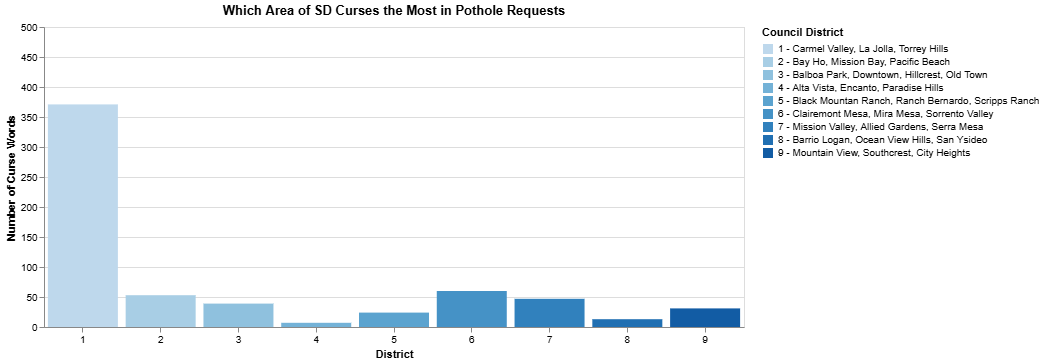

In [6]:
#creating the visual using Altair
color_scale = alt.Scale(
    scheme='blues')

vis_true = alt.Chart(final_district_data).mark_bar().encode(
    x=alt.X(
        'council_district:O', 
        sort='ascending', 
        title='District', 
        axis=alt.Axis(labelAngle=0)
    ),
    y=alt.Y(
        'total_swears:Q',
        title='Number of Curse Words',
        scale=alt.Scale(domain=[0, 500])
    ),
    color=alt.Color(
        'district_label:N', 
        scale=color_scale,
        legend=alt.Legend(
            title = 'Council District',
            labelLimit=500
        )
    ),
    tooltip=['council_district','areas', 'total_requests', 'total_swears', 'percent_with_swears']
).properties(
    title='Which Area of SD Curses the Most in Pothole Requests',
    width=700
)
vis_true




In [7]:
df_trick = df[['council_district','public_description']].copy()
df_trick

#now we want to make a misleading visual, in order to do this, we're going to
#sneakily adjust the data (data cherry picking)
trick_swears = ['fuck', 'fucker', 'fucking', 'bitch','motherfucker','shit','shitty',
          'shits','asshole','ass','damn', 'crap', 'crappy', 'dick', 'pissed',
          'piss','bullshit','hell','dangerous','terrible',
                'horrible','unsafe','broken', 'mess', 'trash', 'disgusting', 'ridiculous',
                'awful', 'hazard', 'damage', 'damaging', 'failure', 'unacceptable']

#cleaning up the columns with no data and making everything lowercase 
#to make filtering easier

df_trick.loc[:,'trick_comment'] = (
    df_trick['public_description'].fillna('').str.lower()
)

#creating a function to count the number of swear words per comment
trickswears = r'\b(' + '|'.join(map(re.escape, trick_swears)) + r')\b'

#applying the function to the df
df_trick['swear_count'] = df_trick['trick_comment'].str.count(trickswears)
df_trick['has_trickswear'] = df_trick['swear_count'] > 0

In [8]:
#aggregating the data
district_count_trick = (
    df_trick.groupby('council_district')
    .agg(
        total_requests=('trick_comment', 'count'),
        total_trickswears=('swear_count', 'sum'),
        percent_with_trickswears=('has_trickswear', 'mean')
    )
    .sort_values('percent_with_trickswears', ascending=False)
)

In [9]:
#creating the legend
areas_district_trick = pd.DataFrame({
    'council_district':[1,2,3,4,5,6,7,8,9],
    'areas':["Carmel Valley, La Jolla, Torrey Hills", 
             "Bay Ho, Mission Bay, Pacific Beach",
             "Balboa Park, Downtown, Hillcrest, Old Town",
             "Alta Vista, Encanto, Paradise Hills",
             "Black Mountain Ranch, Ranch Bernardo, Scripps Ranch",
             "Clairemont Mesa, Mira Mesa, Sorrento Valley",
             "Mission Valley, Allied Gardens, Serra Mesa",
             "Barrio Logan, Ocean View Hills, San Ysideo",
             "Mountain View, Southcrest, City Heights"
            ]
})

district_count_trick_reset=district_count_trick.reset_index()
district_count_trick_reset['council_district'] = district_count_trick_reset['council_district'].astype(int)

trick_district_data = pd.merge(
    district_count_trick_reset,
    areas_district_trick,
    on='council_district',
    how='left'
)
trick_district_data['district_label'] = trick_district_data['council_district'].astype(str) + " - " + trick_district_data['areas']


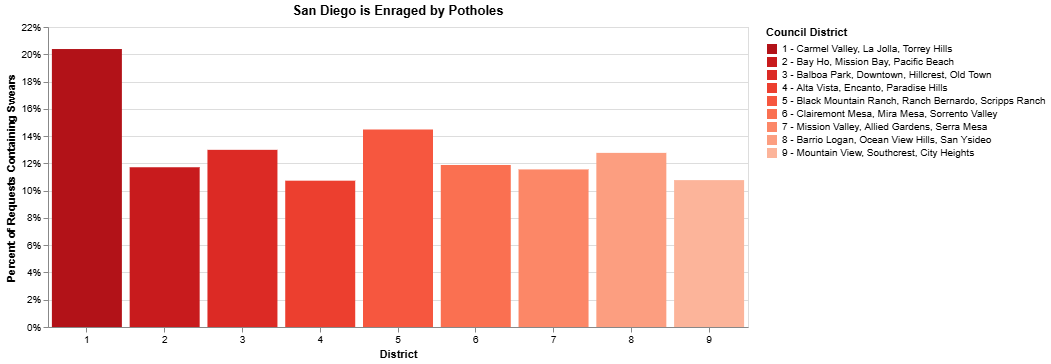

In [10]:
#creating the visual
color_scale = alt.Scale(
    scheme='reds', reverse=True)

vis_trick = alt.Chart(trick_district_data).mark_bar().encode(
    x=alt.X(
        'council_district:O', 
        sort='ascending', 
        title='District', 
        axis=alt.Axis(labelAngle=0)
    ),
    y=alt.Y(
        'percent_with_trickswears:Q',
        title='Percent of Requests Containing Swears',
        axis=alt.Axis(format='%')
    ),
    color=alt.Color(
        'district_label:N', 
        scale=color_scale,
        legend=alt.Legend(
            title='Council District',
            labelLimit=500
        )
    ),
    tooltip=['council_district', 'total_requests', 'total_trickswears', 'percent_with_trickswears']
).properties(
    title='San Diego is Enraged by Potholes',
    width=700
)
vis_trick
